In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fish.csv')
df = df[[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
#type of fish
#set(df["Species"])

Objective: 

1 - To predict the weight of the fish (linear regression)

2 - To predict the type of the fish (classification)

In [3]:
# checking null value in data 
df.isnull().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [5]:
df.shape

(159, 6)

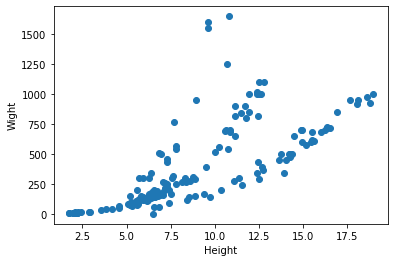

In [16]:
fig, ax = plt.subplots()
ax.scatter( x= df['Height'], y = df['Weight'])
plt.xlabel("Height")
plt.ylabel("Wight")

plt.show()

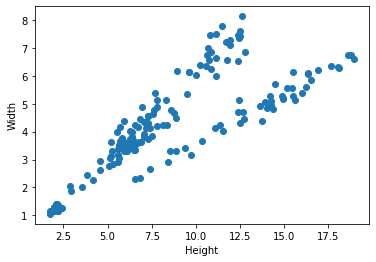

In [7]:
fig, ax = plt.subplots()
ax.scatter( x= df['Height'], y = df['Width'])
plt.xlabel("Height")
plt.ylabel("Width")

plt.show()

mu = 398.3264150943396 and sigma = 356.8508229894959


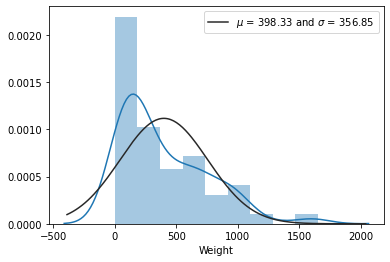

In [9]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df['Weight'], fit = norm)
(mu, sigma)= norm.fit(df['Weight'])
print("mu = {} and sigma = {}".format(mu,sigma))

plt.legend(["$\mu$ = {:.2f} and $\sigma$ = {:.2f}".format(mu,sigma)])

In [10]:
df_skew = "Skewness: {:.2f}".format(df['Weight'].skew())
df_kurtosis = "Kurtosis: {:.2f}".format(df["Weight"].kurt())

print(df_skew, "\n", df_kurtosis)

Skewness: 1.10 
 Kurtosis: 0.88


Data Correlation

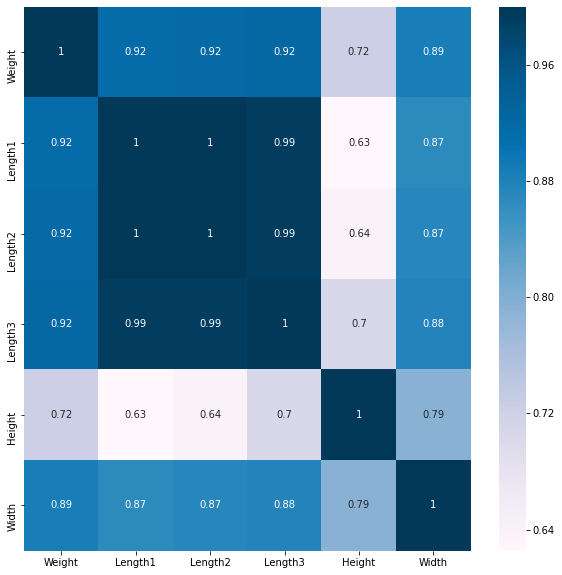

In [11]:
plt.figure(figsize = (10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = plt.cm.PuBu)
plt.show()


### Model Building


In [12]:
from sklearn.model_selection  import train_test_split

X = df.drop('Weight', axis = 1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 5)
(32, 5)
(127,)
(32,)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [69]:
y_test = np.array(y_test) # sckitlearn expect an numpy array from this
y_pred = lr.predict(X_test)

print ("actual value:", y_test[0])
print("Model predicted value: ", y_pred[0])

actual value: 78.0
Model predicted value:  77.68563316842949


In [73]:
for k, j in zip(y_test, y_pred):
    print ("Act val: {}".format(k), "\nModel predict: {:.2f}\n".format(j))

Act val: 78.0 
Model predict: 77.69

Act val: 13.4 
Model predict: -159.12

Act val: 200.0 
Model predict: 385.17

Act val: 270.0 
Model predict: 300.26

Act val: 150.0 
Model predict: 179.41

Act val: 1000.0 
Model predict: 775.67

Act val: 7.0 
Model predict: -214.43

Act val: 180.0 
Model predict: 274.91

Act val: 188.0 
Model predict: 268.45

Act val: 1250.0 
Model predict: 1116.01

Act val: 650.0 
Model predict: 610.12

Act val: 1000.0 
Model predict: 786.34

Act val: 600.0 
Model predict: 585.02

Act val: 150.0 
Model predict: 172.12

Act val: 700.0 
Model predict: 652.86

Act val: 920.0 
Model predict: 785.41

Act val: 1000.0 
Model predict: 926.40

Act val: 218.0 
Model predict: 351.83

Act val: 225.0 
Model predict: 256.32

Act val: 700.0 
Model predict: 587.20

Act val: 10.0 
Model predict: -175.75

Act val: 610.0 
Model predict: 619.15

Act val: 500.0 
Model predict: 516.45

Act val: 500.0 
Model predict: 515.99

Act val: 955.0 
Model predict: 788.65

Act val: 1100.0 
Model 

In [46]:
print(lr.coef_) # theta (weight) value

[ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]


Weight = 43.5352649*(Length1) + 7.82179624*('Length2') + -25.25670105*('Length3') + 23.2289123* ('Height') + 27.06649294*('Width')

In [68]:
print(X.columns)

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')


In [59]:
from sklearn.metrics import mean_squared_error

# checking the quality of theta (weight) value
print(mean_squared_error(y_test, y_pred))

# analysis
# bad value

16763.88719314075


<AxesSubplot:>

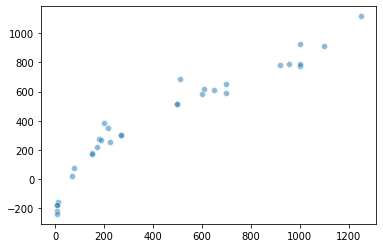

In [62]:
sns.scatterplot(y_test, y_pred, alpha = 0.5)